In [ ]:
# ==========================
# Machine Learning Cheatsheet Notebook
# ==========================
# This notebook covers end-to-end workflows for:
# 1. Regression (df1)
# 2. Classification (df2)
# 3. Clustering (df3)
# Plus easy plotting functions for quick visualization

# --------------------------
# Cell 1: Imports
# --------------------------
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Clustering models
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Plotting
import matplotlib.pyplot as plt

# --------------------------
# Cell 2: Create Datasets
# --------------------------
# df1: Regression dataset
df1_X, df1_y = make_regression(n_samples=200, n_features=3, noise=10, random_state=42)
df1 = pd.DataFrame(df1_X, columns=["feature1", "feature2", "feature3"])
df1['target'] = df1_y

# df2: Classification dataset
df2_X, df2_y = make_classification(n_samples=200,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=0,
                                    n_classes=3,
                                    random_state=42)
df2 = pd.DataFrame(df2_X, columns=["feature1", "feature2", "feature3", "feature4"])
df2['target'] = df2_y

# df3: Clustering dataset
df3_X, df3_y = make_blobs(n_samples=200,
                           n_features=2,
                           centers=4,
                           cluster_std=1.0,
                           random_state=42)
df3 = pd.DataFrame(df3_X, columns=["feature1", "feature2"])
# df3 has no target since it's unsupervised

# Preview data
print("df1 (regression):")
print(df1.head(), end="\n\n")
print("df2 (classification):")
print(df2.head(), end="\n\n")
print("df3 (clustering):")
print(df3.head(), end="\n\n")

# --------------------------
# Cell 3: Regression Pipeline (df1)
# --------------------------
# Split features and target
X1 = df1[["feature1", "feature2", "feature3"]]
y1 = df1['target']

# Train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale features
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Define regression models
greg_models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Train & evaluate
greg_results = []
for name, model in greg_models.items():
    model.fit(X1_train_scaled, y1_train)
    y_pred = model.predict(X1_test_scaled)
    mse = mean_squared_error(y1_test, y_pred)
    r2 = r2_score(y1_test, y_pred)
    greg_results.append((name, mse, r2))
    print(f"{name}: MSE={mse:.2f}, R2={r2:.2f}")

# --------------------------
# Cell 4: Classification Pipeline (df2)
# --------------------------
# Split features and target
X2 = df2[["feature1", "feature2", "feature3", "feature4"]]
y2 = df2['target']

# Train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale features
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Define classification models
clf_models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train & evaluate
clf_results = []
for name, model in clf_models.items():
    model.fit(X2_train_scaled, y2_train)
    y_pred = model.predict(X2_test_scaled)
    acc = accuracy_score(y2_test, y_pred)
    clf_results.append((name, acc))
    print(f"{name}: Accuracy={acc:.2f}")
    print(classification_report(y2_test, y_pred))

# --------------------------
# Cell 5: Clustering Pipeline (df3)
# --------------------------
# Features only
X3 = df3[["feature1", "feature2"]]

# Scale features
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# Define clustering models
cluster_models = {
    'KMeans': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=1.0, min_samples=5),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=4)
}

# Train & evaluate via silhouette score
cluster_results = []
for name, model in cluster_models.items():
    labels = model.fit_predict(X3_scaled)
    score = silhouette_score(X3_scaled, labels)
    cluster_results.append((name, score))
    print(f"{name}: Silhouette Score={score:.2f}")

# --------------------------
# Cell 6: Easy Plotting Functions
# --------------------------
def plot_regression_results(results):
    names, mses, r2s = zip(*results)
    plt.figure(figsize=(8,4))
    plt.bar(names, r2s)
    plt.xticks(rotation=45)
    plt.ylabel('R2 Score')
    plt.title('Regression Model R2 Comparison')
    plt.tight_layout()
    plt.show()


def plot_classification_results(results):
    names, accs = zip(*results)
    plt.figure(figsize=(8,4))
    plt.bar(names, accs)
    plt.xticks(rotation=45)
    plt.ylabel('Accuracy')
    plt.title('Classification Model Accuracy Comparison')
    plt.tight_layout()
    plt.show()


def plot_clustering_results(results, X):
    # results: list of (name, score)
    names, scores = zip(*results)
    plt.figure(figsize=(4,3))
    plt.bar(names, scores)
    plt.xticks(rotation=45)
    plt.ylabel('Silhouette Score')
    plt.title('Clustering Model Silhouette Comparison')
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_regression_results(greg_results)
# plot_classification_results(clf_results)
# plot_clustering_results(cluster_results, X3_scaled)


# Machine Learning Tasks

## 1. Linear Regression

Perform linear regression algorithm to predict:
* The price of a used car. Dataset: `Used_Car_dataset.csv`
* The price of a House. Dataset: `Housing_price_dataset.csv`
* CO2 Emission. Dataset: `FuelConsumption_dataset.csv`

Consider both univariate and multivariate cases for these problems. Elaborate gradient descent algorithm and hyper-parameter tuning for the best result with predefined convergent criteria. Display the hypothesis function and find the accuracy of the linear regression in predicting the correct price.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/FuelConsumption_file.csv')
print(df.head())

   Unnamed: 0  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  \
0           0       2014  ACURA         ILX      COMPACT         2.0   
1           1       2014  ACURA         ILX      COMPACT         2.4   
2           2       2014  ACURA  ILX HYBRID      COMPACT         1.5   
3           3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5   
4           4       2014  ACURA     RDX AWD  SUV - SMALL         3.5   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          4          AS5        Z                   9.9                  6.7   
1          4           M6        Z                  11.2                  7.7   
2          4          AV7        Z                   6.0                  5.8   
3          6          AS6        Z                  12.7                  9.1   
4          6          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0             


--- Univariate Linear Regression ---
Hypothesis: h(x) = 99.40 + 45.72 * EngineSize
MSE: 791.17, R²: 0.79


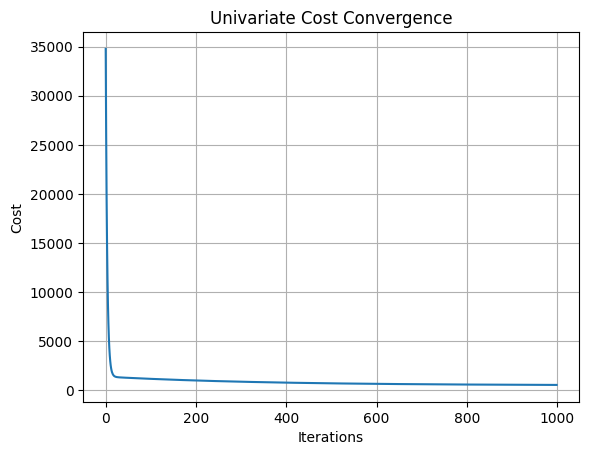

In [ ]:

# ========== STEP 2: LINEAR REGRESSION FUNCTIONS ==========
# Hypothesis: h(x) = X @ theta
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1/m) * X.T.dot(error)
        theta -= alpha * gradient
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)
        if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    return theta, cost_history

def evaluate(X, y, theta):
    predictions = X.dot(theta)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2

# ========== STEP 3: UNIVARIATE LINEAR REGRESSION ==========

print("\n--- Univariate Linear Regression ---")
X_uni = df[['ENGINESIZE']].values
y_uni = df[['CO2EMISSIONS']].values
X_uni = np.c_[np.ones(X_uni.shape[0]), X_uni]
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, y_uni, test_size=0.2,
random_state=4)

theta_uni = np.zeros((X_uni.shape[1], 1))
alpha = 0.01
iterations = 1000
theta_uni_final, cost_history_uni = gradient_descent(X_train_uni, y_train_uni, theta_uni, alpha,
iterations)
# Print hypothesis
print(f"Hypothesis: h(x) = {theta_uni_final[0][0]:.2f} + {theta_uni_final[1][0]:.2f} * EngineSize")
# Accuracy
mse_uni, r2_uni = evaluate(X_test_uni, y_test_uni, theta_uni_final)
print(f"MSE: {mse_uni:.2f}, R²: {r2_uni:.2f}")
# Plot cost
plt.plot(cost_history_uni)
plt.title("Univariate Cost Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


--- Multivariate Linear Regression ---
Hypothesis: h(x) = 29.46 + -1.00*ENGINESIZE + 15.90*CYLINDERS + 11.79*FUELCONSUMPTION_COMB
MSE: 546.10, R²: 0.87


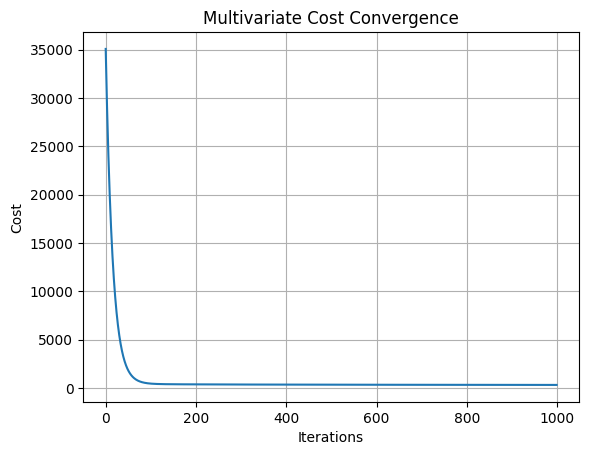

In [ ]:
# ========== STEP 4: MULTIVARIATE LINEAR REGRESSION ==========
print("\n--- Multivariate Linear Regression ---")
X_multi = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].values
y_multi = df[['CO2EMISSIONS']].values
X_multi = np.c_[np.ones(X_multi.shape[0]), X_multi]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi,
test_size=0.2, random_state=42)
theta_multi = np.zeros((X_multi.shape[1], 1))
theta_multi_final, cost_history_multi = gradient_descent(X_train_multi, y_train_multi, theta_multi,
alpha, iterations)
# Print hypothesis
print("Hypothesis: h(x) = {:.2f} + {:.2f}*ENGINESIZE + {:.2f}*CYLINDERS + {:.2f}*FUELCONSUMPTION_COMB".format(*theta_multi_final.flatten()))
# Accuracy
mse_multi, r2_multi = evaluate(X_test_multi, y_test_multi, theta_multi_final)
print(f"MSE: {mse_multi:.2f}, R²: {r2_multi:.2f}")
# Plot cost
plt.plot(cost_history_multi)
plt.title("Multivariate Cost Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

## 2. Non-linear Regression

Perform a non-linear regression algorithm to predict China’s GDP from year 1960 to 2014 from given features. Elaborate gradient descent algorithm and hyper-parameter tuning for the best result with predefined convergent criteria. Dataset: `china_gdp.csv`


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('/content/china_gdp.csv')
# Preprocessing
X = data['Year'].values.reshape(-1, 1)  # Reshape X to a 2D array
y = data['Value'].values
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define the polynomial regression model
degree = 3  # You can tune this hyperparameter
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / n_samples) * X.T @ errors
        theta -= learning_rate * gradient
        cost = (1 / (2 * n_samples)) * np.sum(errors**2)
        cost_history.append(cost)

        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            print(f"Converged after {i} iterations.")
            break

    return theta, cost_history
# Train the model using gradient descent
learning_rate = 0.01  # You can tune this hyperparameter
iterations = 10000  # You can tune this hyperparameter
tolerance = 1e-6
theta, cost_history = gradient_descent(X_train_poly, y_train, learning_rate, iterations, tolerance)
# Make predictions
y_pred = X_test_poly @ theta
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.1118783600921898e+23
R-squared: 0.9679050909372139


## 3. Logistic Regression

Perform logistic regression to classify if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Utilize gradient descent with regularization for hyper-parameter tuning. Also, generate log-loss curve for this problem. Dataset: `samples_cancer.csv`


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("samples_cancer.csv")
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors="coerce")
df.dropna(inplace=True)
label_encoders = {}
for col in ['Class']:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])  # Convert category labels
  label_encoders[col]=encoder
feature_df=df[df.columns[0:-1]]
X=np.asarray(feature_df)
y=np.asarray(df[df.columns[-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
lr = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:

df.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [ ]:
print("Classes after encoding:", encoder.classes_)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", np.round(accuracy * 100, 2), "%")
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Classes after encoding: [2 4]
Logistic Regression Accuracy: 65.69 %

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        90
           1       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted tumor for a patient: [2]
Training Log Loss: 0.6432
Testing Log Loss: 0.6307


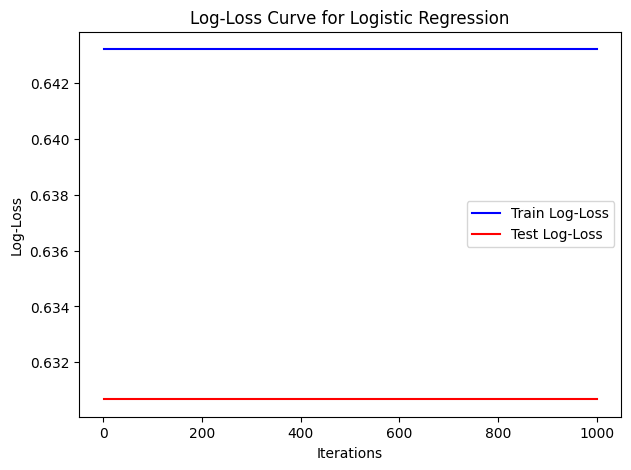

In [ ]:
features = [[1000025, 5,  1,  1,  1,  2,  1,  3, 1, 1]]
predicted_category = lr.predict(features)
print("Predicted tumor for a patient:",
label_encoders["Class"].inverse_transform(predicted_category))
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Testing Log Loss: {test_log_loss:.4f}")
import numpy as np
import matplotlib.pyplot as plt
y_train_prob_pos = y_train_prob[:, 1] if y_train_prob.ndim > 1 else y_train_prob
y_test_prob_pos = y_test_prob[:, 1] if y_test_prob.ndim > 1 else y_test_prob
# Function to calculate log-loss
def compute_log_loss(y_true, y_pred):
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
# Store log-loss at each iteration during training
train_log_loss = []
test_log_loss = []
for i in range(1, 1001):  # Replace 1000 with your actual number of iterations
  # Calculate the log-loss for training and test set at each iteration
  train_log_loss.append(compute_log_loss(y_train, y_train_prob_pos))
  test_log_loss.append(compute_log_loss(y_test, y_test_prob_pos))
# Update your model parameters here for each iteration (this part depends on your implementation)
# Plotting Log-Loss Curve
epochs = np.arange(1, len(train_log_loss) + 1)
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_log_loss, label="Train Log-Loss", color="blue")
plt.plot(epochs, test_log_loss, label="Test Log-Loss", color="red")
plt.xlabel("Iterations")
plt.ylabel("Log-Loss")
plt.title("Log-Loss Curve for Logistic Regression")
plt.legend()
plt.show()

## 4. Decision Tree

Using Decision Tree algorithm, predict which drug among drug X, drug Y and drug C should be given to a patient. Find the accuracy of the decision tree in predicting the correct drug for the patient. Dataset: `drug.csv`

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
data = pd.read_csv('/content/drug.csv')  # Replace with the actual path if needed
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # Features
y = data['Drug']  # Target variable
# Create a LabelEncoder for categorical features
label_encoder = LabelEncoder()
# Fit and transform the 'Sex' column
X['Sex'] = label_encoder.fit_transform(X['Sex'])
# Fit and transform the 'BP' column
X['BP'] = label_encoder.fit_transform(X['BP'])
# Fit and transform the 'Cholesterol' column
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


<ipython-input-67-5fe6baf4fba8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
<ipython-input-67-5fe6baf4fba8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BP'] = label_encoder.fit_transform(X['BP'])
<ipython-input-67-5fe6baf4fba8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

## 5. KNN

Using KNN algorithm, predict which category a customer belongs to on the basis of the data provided by a telecommunications firm. Find the accuracy of the KNN algorithm in predicting the category of a customer. Dataset: `teleCust.csv`


In [ ]:
!pip install scikit-learn pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Load the dataset
data = pd.read_csv('/content/teleCust.csv')  # Replace with the actual path if needed
# Separate features (X) and target (y)
X = data.drop('custcat', axis=1)  # Assuming 'custcat' is the target column
y = data['custcat']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create and train the KNN classifier
k = 5  # Number of neighbors (you can tune this hyperparameter)
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
# Make predictions
y_pred = knn_classifier.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (k={k}): {accuracy}")

Accuracy of KNN (k=5): 0.335


## 6. Naive Bayes

Using Gaussian and Multinomial Naive Bayes algorithms, predict if a person is diabetic or not, based on the features provided. Find accuracy and F1-Scores of both algorithms. Dataset: `pima-indians-diabetes.data.csv`


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/pima-indians-diabetes.csv')
X = dataset.iloc[:, :-1 ].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average='weighted')

[[89 12]
 [18 35]]


0.8021603396603396

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[101   0]
 [ 53   0]]


0.6558441558441559

In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.5195314489432136

## 7. SVM

Using SVM algorithm, predict if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Use the following kernel for the SVM algorithm:
a) Linear
b) Polynomial
c) RBF
d) Sigmoid
Find the following metrics for each of the SVM algorithms:
1) Accuracy
2) Recall
3) Precision
4) F1-Score
5) Jaccard Score
6) Error rates
7) Confusion Matrix
Compare all four SVM models using an ROC curve. Dataset: `samples_cancer.csv`


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
# Load dataset
df = pd.read_csv('samples_cancer.csv')
print(df.head())

        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


In [ ]:
# Step 3: Data Preprocessing
# Convert BareNuc to numeric (in case of '?')
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
# Drop rows with missing values
df.dropna(inplace=True)
# Drop the 'ID' column
df.drop(columns=['ID'], inplace=True)
# Convert target: 2 = Benign (0), 4 = Malignant (1)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)
# Step 4: Feature Scaling
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)
import seaborn as sns
# Step 5: Train and Evaluate SVM Models


Kernel: SIGMOID
Accuracy: 0.9635
Recall: 1.0000
Precision: 0.9038
F1-Score: 0.9495
Jaccard Score: 0.9038
Error Rate: 0.0365


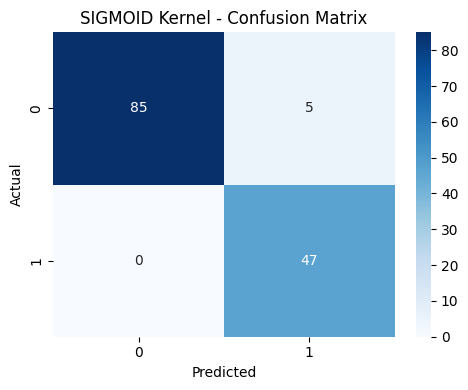

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
fpr_dict, tpr_dict = {}, {}
for kernel in kernels:
  model = SVC(kernel=kernel, probability=True, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]
  acc = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  jaccard = jaccard_score(y_test, y_pred)
  error = 1 - acc
  cm = confusion_matrix(y_test, y_pred)
results[kernel] = {
    'Accuracy': acc,
'Recall': rec,
'Precision': prec,
'F1-Score': f1,
'Jaccard Score': jaccard,
'Error Rate': error,
'Confusion Matrix': cm
}
# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
fpr_dict[kernel] = fpr
tpr_dict[kernel] = tpr
import seaborn as sns
import matplotlib.pyplot as plt
# Step 6: Display Results with Confusion Matrix Heatmaps
for kernel in results:
  print(f"\nKernel: {kernel.upper()}")
  for metric, value in results[kernel].items():
    if metric != "Confusion Matrix":
      print(f"{metric}: {value:.4f}")
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(results[kernel]["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
plt.title(f"{kernel.upper()} Kernel - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Skipping linear: data not found in dictionaries.
Skipping poly: data not found in dictionaries.
Skipping rbf: data not found in dictionaries.


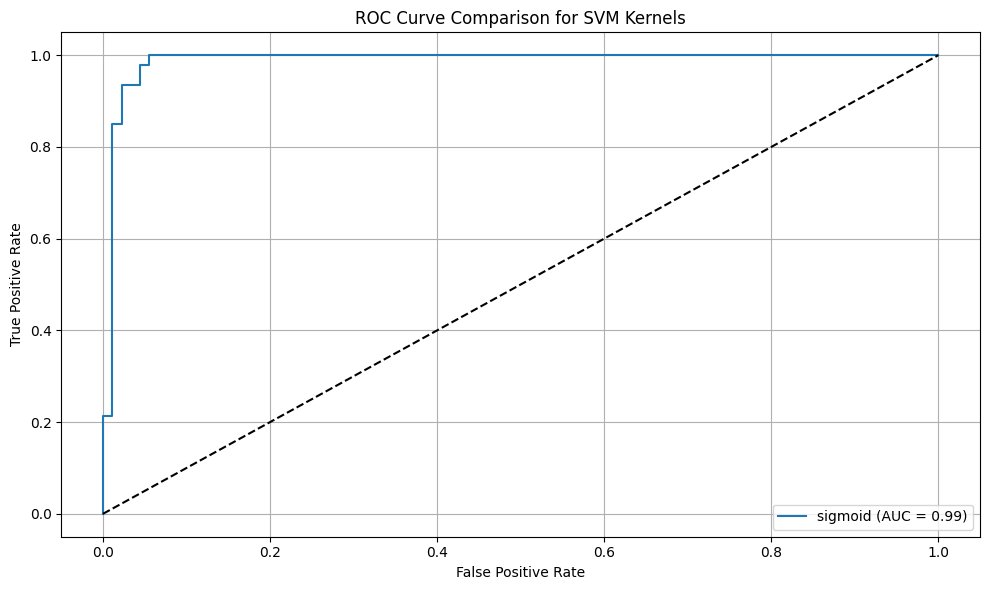

In [ ]:
plt.figure(figsize=(10, 6))
for kernel in kernels:
    if kernel in fpr_dict and kernel in tpr_dict:
        fpr = fpr_dict[kernel]
        tpr = tpr_dict[kernel]
        plt.plot(fpr, tpr, label=f'{kernel} (AUC = {auc(fpr, tpr):.2f})')
    else:
        print(f"Skipping {kernel}: data not found in dictionaries.")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 8. Comparative Classification

Applying SVM, Naive Bayes, Decision tree and KNN predict diabetes based on features set. Compare the four classification algorithms with performance metrics such as accuracy, recall, precision, F1- score. Also design the heat map confusion matrix for above algorithms and construct ROC curve for comparison. Dataset: `pima-indians-diabetes.data.csv`



SVM
Accuracy: 0.7273
Recall: 0.5636
Precision: 0.6327
F1 Score: 0.5962

Naive Bayes
Accuracy: 0.7662
Recall: 0.7091
Precision: 0.6610
F1 Score: 0.6842

Decision Tree
Accuracy: 0.7468
Recall: 0.7273
Precision: 0.6250
F1 Score: 0.6723

KNN
Accuracy: 0.6883
Recall: 0.4909
Precision: 0.5745
F1 Score: 0.5294


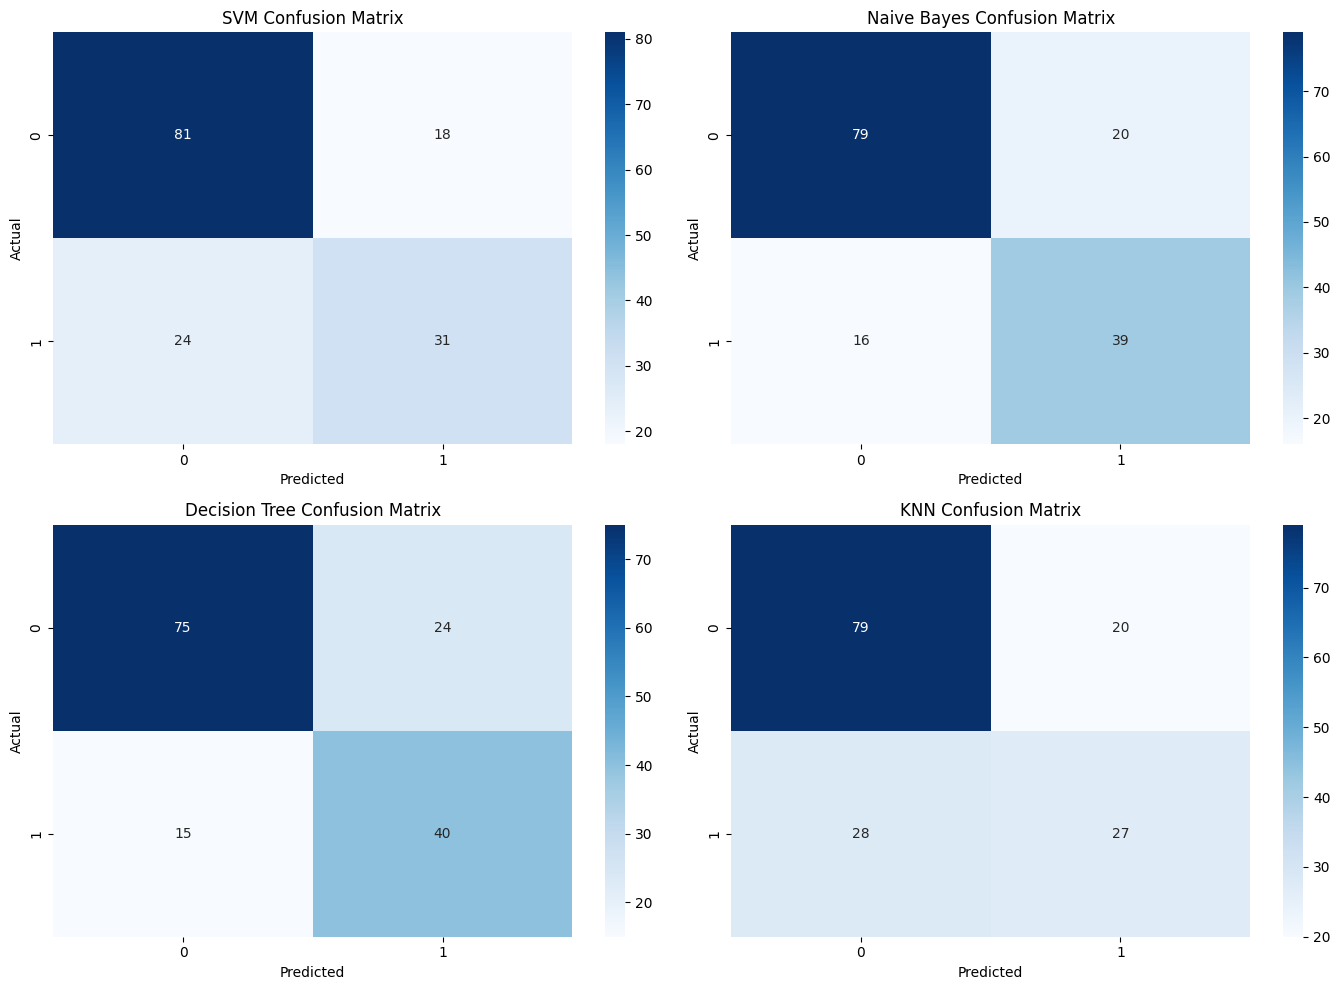

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
confusion_matrix, roc_curve, auc
)
# # Step 2: Upload the dataset
# from google.colab import files
# uploaded = files.upload()
# Step 3: Load the dataset
df = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)
df.head()
# Step 4: Prepare features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Step 5: Normalize and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Step 6: Import models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    "SVM": SVC(probability=True),
"Naive Bayes": GaussianNB(),
"Decision Tree": DecisionTreeClassifier(),
"KNN": KNeighborsClassifier()
}
metrics = {}
# Step 7: Train and Evaluate
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]
  acc = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  metrics[name] = {
    "Accuracy": acc,
    "Recall": rec,
    "Precision": prec,
    "F1 Score": f1,
    "Confusion Matrix": cm,
    "y_prob": y_prob
  }

# Step 8: Print metrics
for name in metrics:
  print(f"\n{name}")
  print(f"Accuracy: {metrics[name]['Accuracy']:.4f}")
  print(f"Recall: {metrics[name]['Recall']:.4f}")
  print(f"Precision: {metrics[name]['Precision']:.4f}")
  print(f"F1 Score: {metrics[name]['F1 Score']:.4f}")

# Plot all confusion matrices
plt.figure(figsize=(14, 10))
for i, name in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  sns.heatmap(metrics[name]["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
  plt.title(f"{name} Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
plt.tight_layout()
plt.show()

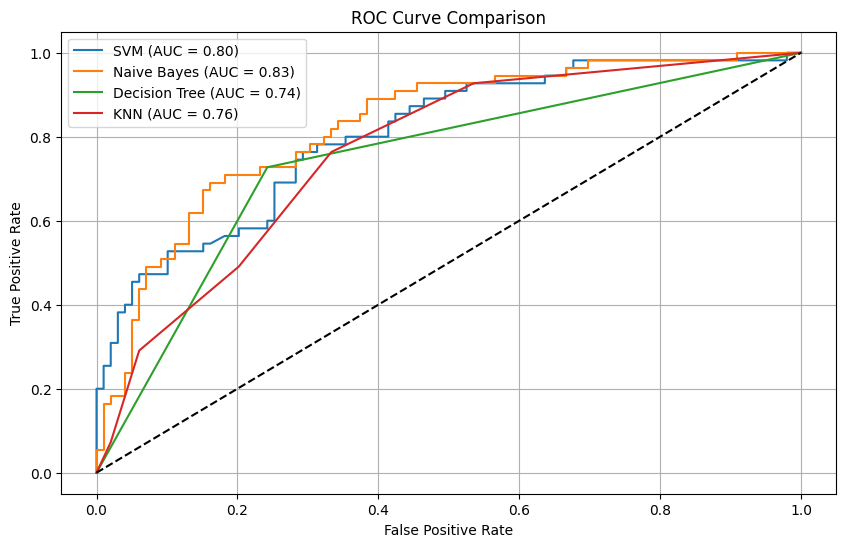

In [ ]:
# ROC Curve comparison
plt.figure(figsize=(10, 6))
for name in models:
  fpr, tpr, _ = roc_curve(y_test, metrics[name]["y_prob"])
  plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

## 9. Neural Network for XOR

Design and train the neural network that computes the functionality of XOR function.


In [ ]:
# Step 1: Import libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Step 2: Define XOR data
X = np.array([[0, 0],
[0, 1],
[1, 0],
[1, 1]])
y = np.array([[0],
[1],
[1],
[0]])
# Step 3: Build the model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid'))
# Step 4: Compile the model
# Output layer
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy',
metrics=['accuracy'])
# Step 5: Train the model
model.fit(X, y, epochs=500, verbose=0)
# Step 6: Evaluate and Predict
predictions = model.predict(X).round()
print("\n XOR Predictions:")
for i in range(len(X)):
  print(f"Input: {X[i]} -> Predicted Output: {int(predictions[i][0])}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

 XOR Predictions:
Input: [0 0] -> Predicted Output: 0
Input: [0 1] -> Predicted Output: 0
Input: [1 0] -> Predicted Output: 1
Input: [1 1] -> Predicted Output: 0


## 10. Multilayer Perceptron

Perform Multilayer perception neural network to classify flower type. Utilize number of hidden layer 5 and 200 to 400 iteration with learning rate. Try with different loss functions/ activation functions such as MSE, Cross entropy, sigmoid, tanh, ReLU along with different optimizer GD, SGD, Adam. Illustrate the result with performance metrics and observe Weight, Loss curve and accuracy curve. Dataset: `Iris dataset`


In [ ]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy

iris = pd.read_csv('iris.csv', header=None)
iris.head()

,0,1,2,3,4
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


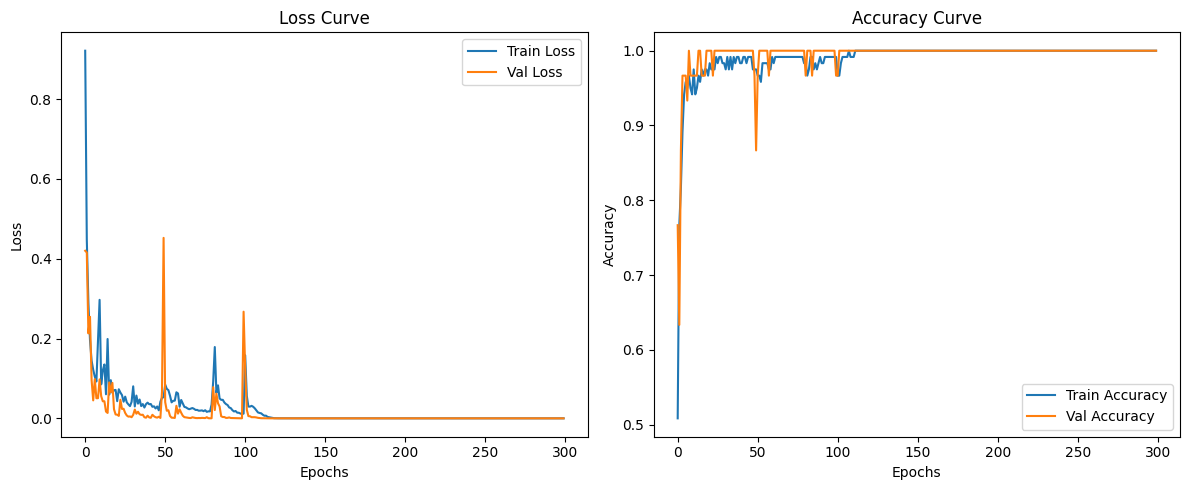

In [ ]:
# Step 2: Load and prepare Iris data
iris = load_iris()
X = iris.data
y = iris.target
# One-hot encode the target
lb = LabelBinarizer()
y = lb.fit_transform(y)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Step 3: Build MLP model (with 5 hidden layers)
def build_model(activation='relu', loss_fn='mse', optimizer='adam', learning_rate=0.01):
  model = Sequential()
  model.add(Dense(64, input_dim=4, activation=activation))
  for _ in range(4):  # 5 layers in total
    model.add(Dense(64, activation=activation))
  model.add(Dense(3, activation='softmax'))  # Output layer
  # Choose optimizer
  if optimizer == 'sgd':
    opt = SGD(learning_rate=learning_rate)
  elif optimizer == 'adam':
    opt = Adam(learning_rate=learning_rate)
  else:
    opt = SGD(learning_rate=learning_rate)  # Default fallback
  # Choose loss function
  if loss_fn == 'mse':
    loss = MeanSquaredError()
  elif loss_fn == 'crossentropy':
    loss = CategoricalCrossentropy()
  else:
    loss = MeanSquaredError()
  model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
  return model

# Step 4: Train and evaluate the model
activation = 'relu'
# Try: 'sigmoid', 'tanh', 'relu'
loss_fn = 'crossentropy'
# Try: 'mse', 'crossentropy'
optimizer = 'adam'
# Try: 'sgd', 'adam'
learning_rate = 0.01
epochs = 300
model = build_model(activation, loss_fn, optimizer, learning_rate)
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
# Step 5: Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))
# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Final Evaluation on Test Set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {accuracy*100:.2f}% | Loss: {loss:.4f}")


 Final Test Accuracy: 100.00% | Loss: 0.0000


## 11. K-Means Clustering

Perform k- means clustering algorithm for customer segmentation from given features. Utilize Euclidean distance and Manhattan distance for this problem. Also, plot in terms of 2D and 3D clusters this problem. Dataset: `Customer segmentation dataset`


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
# Load the dataset (update name if different)
df = pd.read_csv("/content/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


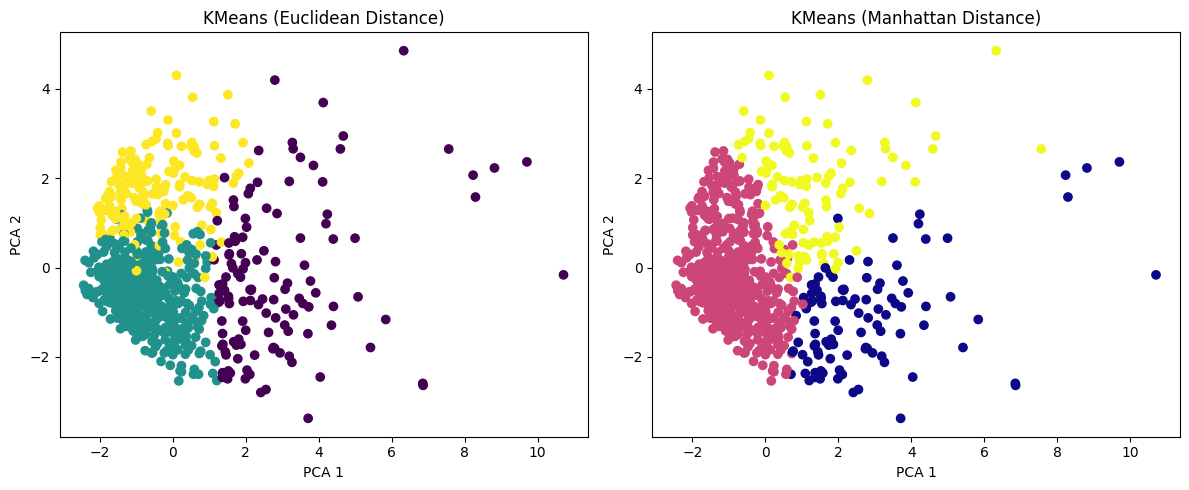

In [ ]:
df = df.dropna()
X = df.select_dtypes(include=[np.number])
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_euc = KMeans(n_clusters=3, random_state=42)
labels_euc = kmeans_euc.fit_predict(X_scaled)
df['Cluster_Euclidean'] = labels_euc
def kmeans_manhattan(X, k, max_iters=100):
  np.random.seed(42)
  centroids = X[np.random.choice(range(len(X)), k, replace=False)]
  for _ in range(max_iters):
    labels = np.argmin(cdist(X, centroids, metric='cityblock'), axis=1)
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    if np.allclose(centroids, new_centroids):
      break
    centroids = new_centroids
  return labels, centroids

labels_man, _ = kmeans_manhattan(X_scaled, k=3)
df['Cluster_Manhattan'] = labels_man
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12,5))
# Euclidean Clustering
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster_Euclidean'], cmap='viridis')
plt.title('KMeans (Euclidean Distance)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# Manhattan Clustering
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster_Manhattan'], cmap='plasma')
plt.title('KMeans (Manhattan Distance)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

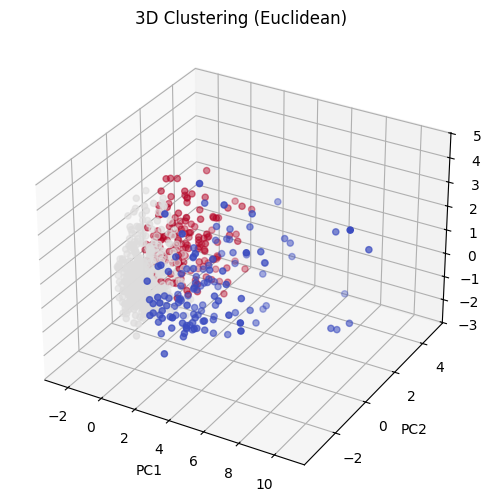

In [ ]:
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=df['Cluster_Euclidean'], cmap='coolwarm')
ax.set_title('3D Clustering (Euclidean)')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## 12. Hierarchical Clustering

Perform hierarchical clustering such as Agglomerative algorithm and Divisive algorithm to group several vehicles. Utilize single, complete and average linkage to define the cluster. Also draw the dendogram for this problem. Dataset: `Vehicle dataset`


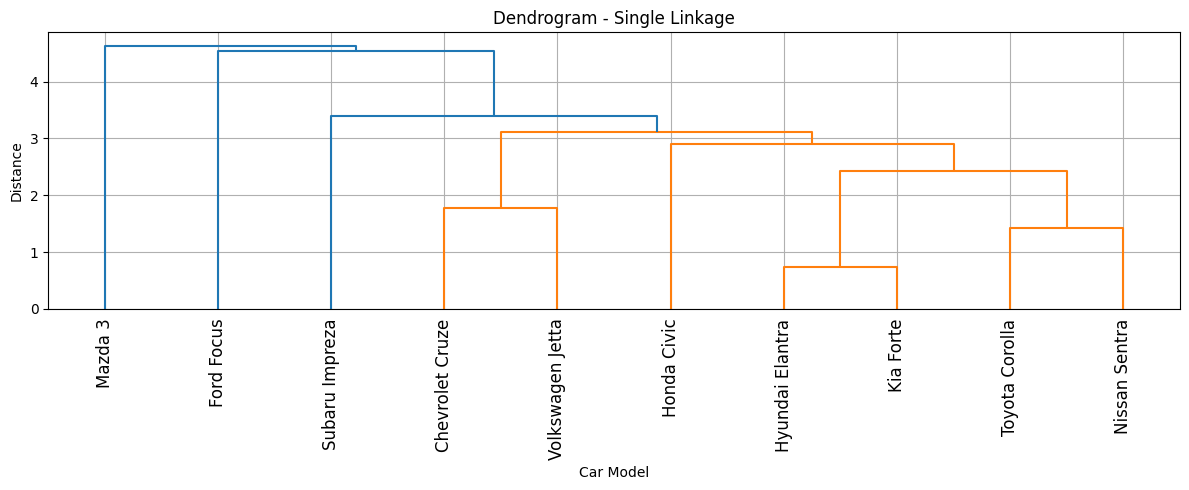

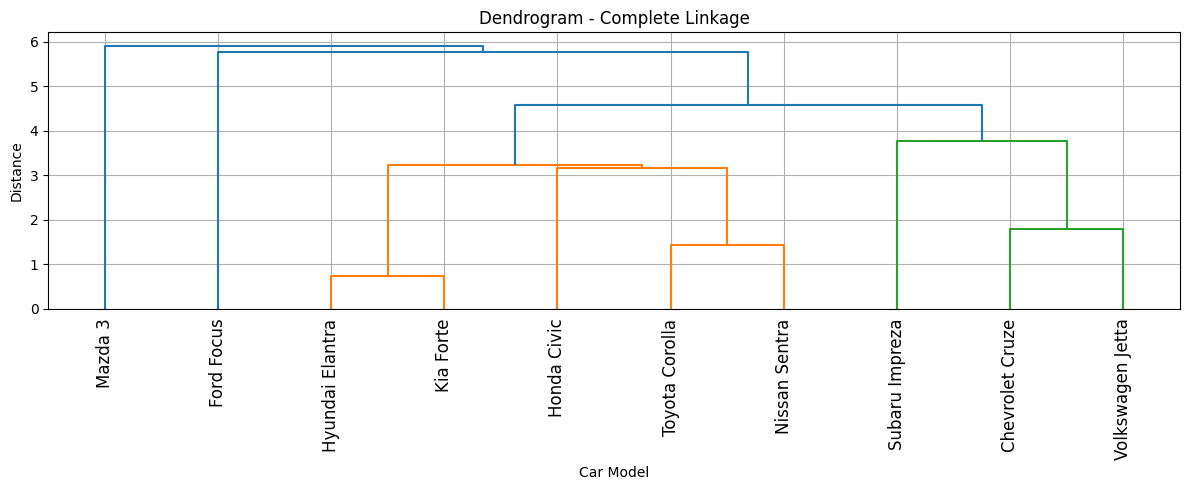

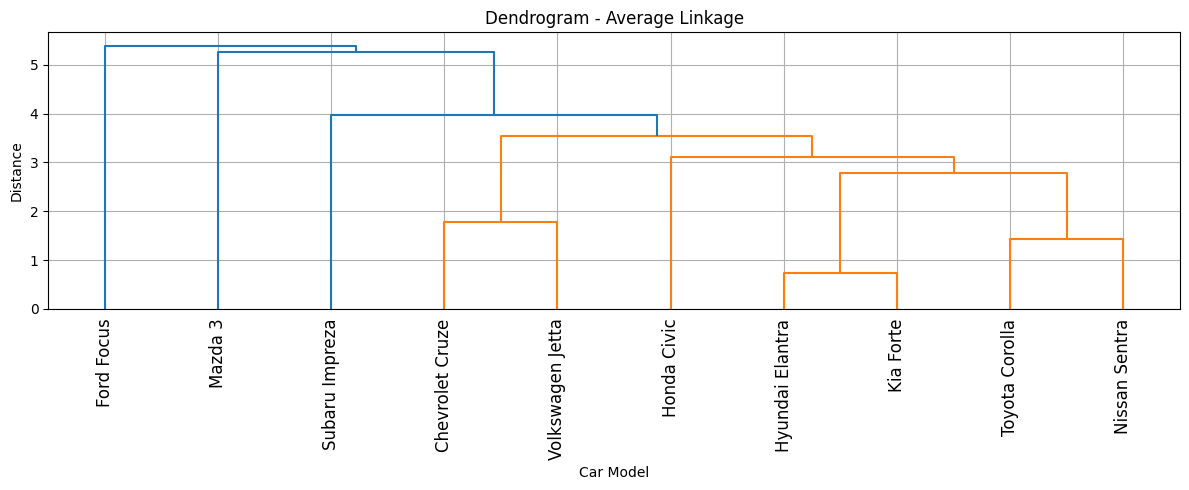

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# Load dataset
df = pd.read_csv('/content/Vehicle_dataset.csv')
# Step 1: Load & Clean Data
df.replace('$null$', np.nan, inplace=True)
df.dropna(inplace=True)
# Convert necessary columns to numeric
cols_to_convert = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
df[cols_to_convert] = df[cols_to_convert].astype(float)
# Step 2: Select Features for Clustering
features = df[cols_to_convert]
# Step 3: Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Step 4 & 5: Dendrograms with 3 Linkage Types
linkage_methods = ['single', 'complete', 'average']
labels = df['manufact'] + ' ' + df['model']
for method in linkage_methods:
  plt.figure(figsize=(12, 5))
  Z = linkage(scaled_features, method=method)
  dendrogram(Z, labels=labels.values, leaf_rotation=90)
  plt.title(f'Dendrogram - {method.capitalize()} Linkage')
  plt.xlabel('Car Model')
  plt.ylabel('Distance')
  plt.tight_layout()
  plt.grid(True)
  plt.show()

## 13. DBSCAN Clustering

Perform DBSCAN algorithm for weather station clustering. Utilize proper data cleaning and feature selection. Also, plot all outlier of the cluster label. Dataset: `Weather Station dataset`


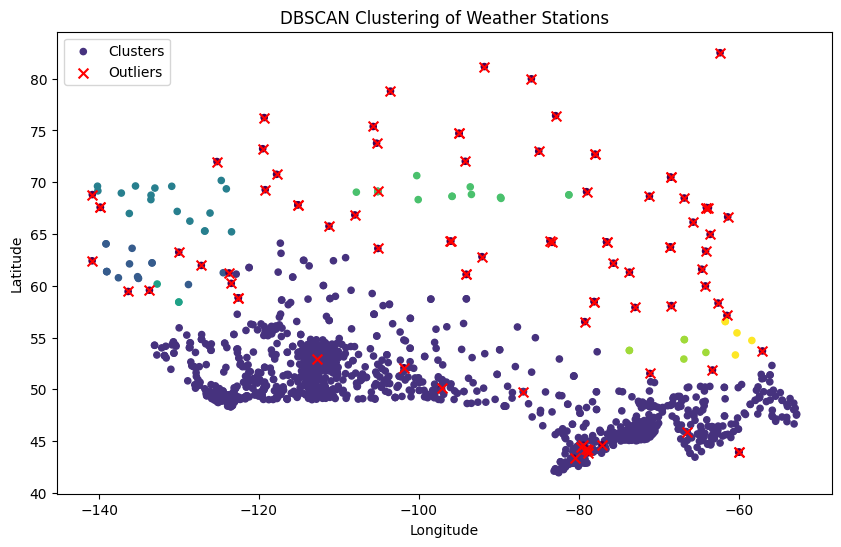

In [ ]:
!pip install scikit-learn pandas matplotlib numpy
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('/content/weather-stations.csv')
# Data Cleaning and Feature Selection
# 1. Select relevant features for clustering (latitude, longitude, temperature, etc.)
features = ['Tm', 'Tx', 'Tn', 'Lat', 'Long']
X = data[features].dropna()  # Drop rows with missing values in selected features
# 2. Handle any other necessary data cleaning (e.g., outliers, data type conversions)
# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply DBSCAN clustering
# Experiment with different eps and min_samples values to find optimal clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust these hyperparameters
cluster_labels = dbscan.fit_predict(X_scaled)
# Identify and plot outliers
outliers = X[cluster_labels == -1]  # Outliers are labeled as -1
# Plot the clusters and outliers
plt.figure(figsize=(10, 6))
plt.scatter(X['Long'], X['Lat'], c=cluster_labels, cmap='viridis', s=20, label='Clusters')
plt.scatter(outliers['Long'], outliers['Lat'], c='red', marker='x', s=50, label='Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Weather Stations')
plt.legend()
plt.show()

## 14. Recommender System

Design a recommender system (content based or item-item recommendation) for movie data. Dataset: `Movies dataset`


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
movies=pd.read_csv('movies.csv')
movies.dropna(inplace=True)
movies = movies.head(1000)  # we can adjust this number if RAM allows
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Clean genre strings
movies['genres'] = movies['genres'].str.replace('|', ' ', regex=False)
# TF-IDF transformation
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies['genres'])
cosine_sim = cosine_similarity(tfidf_matrix)
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
def recommend_movie(title, num_recommendations=5):
  if title not in indices:
    return "Movie not found in dataset."
  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:num_recommendations+1]
  movie_indices = [i[0] for i in sim_scores]
  return movies['title'].iloc[movie_indices].tolist()

print(" Recommendations for 'Toy Story (1995)':")
recommendations = recommend_movie('Toy Story (1995)', 5)
print(recommendations)
for i, movie in enumerate(recommendations, 1):
  print(f"{i}. {movie}")

 Recommendations for 'Toy Story (1995)':
['Pagemaster, The (1994)', 'James and the Giant Peach (1996)', 'Balto (1995)', 'Space Jam (1996)', 'Kids of the Round Table (1995)']
1. Pagemaster, The (1994)
2. James and the Giant Peach (1996)
3. Balto (1995)
4. Space Jam (1996)
5. Kids of the Round Table (1995)


## 15. News Category Classification

Given the headline of a news, the objective is to identify the category of news.

Note: Use only headline as input and predict category
For example:
Short\_description: ....
Headline: There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV
Date : ....
Link : ....
Authors: ....
Category: CRIME
Consider the following categories only: Business, Comedy, Sports, Crime, and Religion

The Features of this dataset is described as:
a. Lexical Features: Word n-gram.
b. Syntactic Features: Parts of speech tag unigrams.
Implement n-gram (n=1,2 and 3), called unigram, bigram and trigram features for each instance. You may choose only the most frequent n-gram to provide as a features for your model. For n=1, use 500 most frequent unigram, similarly use 300 and 200 most frequent bigram and trigram respectively.
For parts of speech tag unigrams, first you need to get POS tag for each instance. You can use any library like Stanford POS tagger. Find the following link for it:
https://nlp.stanford.edu/software/tagger.shtml
For NLTK POS tagger see
http://www.nltk.org/book/ch05.html
Similar to lexical feature use 500 most frequent unigram to build the model.

Result and Evaluation: Perform 10-fold cross-validation and report the performance of the classification models: Decision Tree, SVM, ANN and Maximum Entropy. Analysis the result with different performance evaluation metrics. Dataset: `news-category-dataset.json`